<a href="https://colab.research.google.com/github/LandonAmickUNCC/ECGR4105/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Landon* Amick 801293791 Homework 4 https://github.com/LandonAmickUNCC/ECGR4105

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report

Part 1

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

breast = load_breast_cancer()
breast_data = breast.data

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_breast_data = scaler.fit_transform(breast_data)

breast_input = pd.DataFrame(scaled_breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:

# Define features (X) and target (y) for the breast cancer dataset
X = breast.data
y = breast.target

# Split the breast cancer data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using a fixed random_state for reproducibility

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

test_size = .2
seed = 0

# Use the scaled data
X = scaled_breast_data
y = breast.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model_sigmoid = SVC(kernel='sigmoid', C=1E10)
model_sigmoid.fit(X_train, Y_train)
predicted_sigmoid = model_sigmoid.predict(X_test)
report_sigmoid = classification_report(Y_test, predicted_sigmoid)
print("Classification Report for SVC with Sigmoid Kernel:")
print(report_sigmoid)

Classification Report for SVC with Sigmoid Kernel:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        47
           1       0.91      0.88      0.89        67

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

test_size = .2
seed = 0

# Use the scaled data
X = scaled_breast_data
y = breast.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model_rbf = SVC(kernel='rbf', C=1E10)
model_rbf.fit(X_train, Y_train)
predicted_rbf = model_rbf.predict(X_test)
report_rbf = classification_report(Y_test, predicted_rbf)
print("Classification Report for SVC with RBF Kernel:")
print(report_rbf)

Classification Report for SVC with RBF Kernel:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



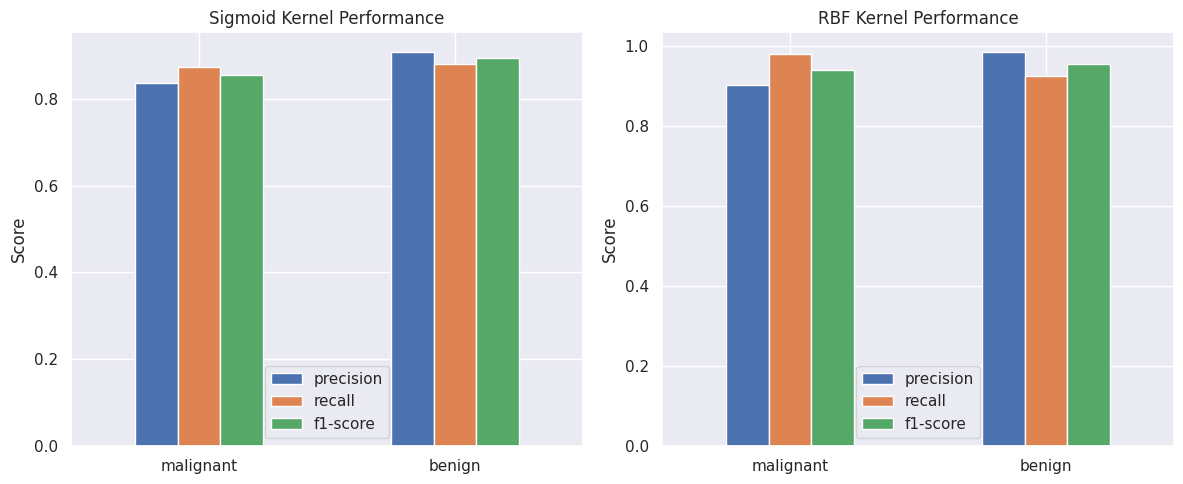

In [ ]:

# Get classification reports as dictionaries
report_sigmoid_dict = classification_report(Y_test, model_sigmoid.predict(X_test), target_names=breast.target_names, output_dict=True)
report_rbf_dict = classification_report(Y_test, model_rbf.predict(X_test), target_names=breast.target_names, output_dict=True)

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']
classes = breast.target_names

sigmoid_scores = {metric: [report_sigmoid_dict[cls][metric] for cls in classes] for metric in metrics}
rbf_scores = {metric: [report_rbf_dict[cls][metric] for cls in classes] for metric in metrics}

# Create a DataFrame for easier plotting
df_sigmoid = pd.DataFrame(sigmoid_scores, index=classes)
df_rbf = pd.DataFrame(rbf_scores, index=classes)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_sigmoid.plot(kind='bar', ax=axes[0])
axes[0].set_title('Sigmoid Kernel Performance')
axes[0].set_ylabel('Score')
axes[0].tick_params(axis='x', rotation=0)

df_rbf.plot(kind='bar', ax=axes[1])
axes[1].set_title('RBF Kernel Performance')
axes[1].set_ylabel('Score')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

After trying all SVM kernels the  only two that would run was RBF and Sigmoid these two provided similar results for both malignant and benign accross both kernel methods.

Part 2

In [ ]:
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'

df = pd.read_csv(url)

# Convert 'yes'/'no' columns to 1/0
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in yes_no_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

# Select features (X) and target (y)
X_housing = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y_housing = df['price']

# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_housing = scaler.fit_transform(X_housing)
scaled_X_housing = pd.DataFrame(scaled_X_housing, columns=X_housing.columns)


print("Original Data Head:")
print(df.head())
print("\nScaled Features Head:")
print(scaled_X_housing.head())

Original Data Head:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  

Scaled Feat

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) for the housing dataset
# Now using the scaled features
X_housing = scaled_X_housing
y_housing = df['price']

# Split the housing data into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42) # Using a fixed random_state for reproducibility

print("Shape of X_train_housing:", X_train_housing.shape)
print("Shape of X_test_housing:", X_test_housing.shape)
print("Shape of y_train_housing:", y_train_housing.shape)
print("Shape of y_test_housing:", y_test_housing.shape)

Shape of X_train_housing: (436, 11)
Shape of X_test_housing: (109, 11)
Shape of y_train_housing: (436,)
Shape of y_test_housing: (109,)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


test_size = .2
seed = 0
# Use the scaled data for splitting
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(scaled_X_housing, y_housing, test_size=test_size,
random_state=seed)

# Create and train an SVR model
model_svr_rbf = SVR(kernel='rbf', C=1E5) # Using RBF kernel with a potentially more reasonable C
model_svr_rbf.fit(X_train_housing, y_train_housing)

# Make predictions on the test set
house_predicted_svr_rbf = model_svr_rbf.predict(X_test_housing)

# Evaluate the model using regression metrics
mse_rbf = mean_squared_error(y_test_housing, house_predicted_svr_rbf)
r2_rbf = r2_score(y_test_housing, house_predicted_svr_rbf)

print(f"Mean Squared Error (MSE): {mse_rbf}")
print(f"R-squared (R2): {r2_rbf}")

Mean Squared Error (MSE): 1497011429789.272
R-squared (R2): 0.48047822660186423


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

test_size = .2
seed = 0
# Use the scaled data for splitting
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(scaled_X_housing, y_housing, test_size=test_size,
random_state=seed)

# Create and train an SVR model
model_svr_poly = SVR(kernel='poly', C=1E5) # Using poly kernel with a potentially more reasonable C
model_svr_poly.fit(X_train_housing, y_train_housing)

# Make predictions on the test set
house_predicted_svr_poly = model_svr_poly.predict(X_test_housing)

# Evaluate the model using regression metrics
mse_poly = mean_squared_error(y_test_housing, house_predicted_svr_poly)
r2_poly = r2_score(y_test_housing, house_predicted_svr_poly)

print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R2): {r2_poly}")

Mean Squared Error (MSE): 1414338305073.0398
R-squared (R2): 0.5091690485356608


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

test_size = .2
seed = 0
# Use the scaled data for splitting
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(scaled_X_housing, y_housing, test_size=test_size,
random_state=seed)

# Create and train an SVR model
model_svr_sigmoid = SVR(kernel='sigmoid', C=1E5) # Using sigmoid kernel with a potentially more reasonable C
model_svr_sigmoid.fit(X_train_housing, y_train_housing)

# Make predictions on the test set
house_predicted_svr_sigmoid = model_svr_sigmoid.predict(X_test_housing)

# Evaluate the model using regression metrics
mse_sigmoid = mean_squared_error(y_test_housing, house_predicted_svr_sigmoid)
r2_sigmoid = r2_score(y_test_housing, house_predicted_svr_sigmoid)

print(f"Mean Squared Error (MSE): {mse_sigmoid}")
print(f"R-squared (R2): {r2_sigmoid}")

Mean Squared Error (MSE): 1118408301058.9658
R-squared (R2): 0.6118683849787705


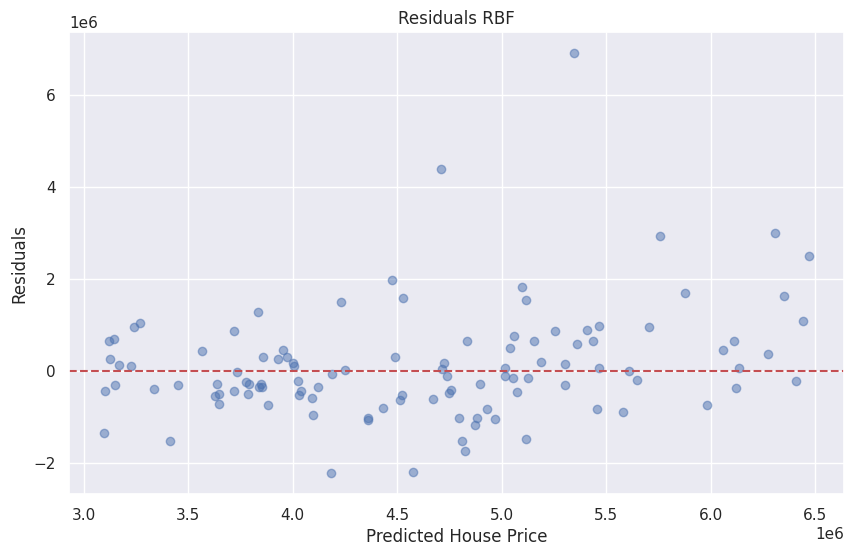

Mean Squared Error (MSE): 1497011429789.272
R-squared (R2): 0.48047822660186423


In [ ]:
# Calculate the residuals
residuals_rbf = y_test_housing - house_predicted_svr_rbf

# Create a scatter plot of predicted values vs residuals
plt.figure(figsize=(10, 6))
plt.scatter(house_predicted_svr_rbf, residuals_rbf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at zero
plt.xlabel('Predicted House Price')
plt.ylabel('Residuals')
plt.title('Residuals RBF')
plt.grid(True)
plt.show()
print(f"Mean Squared Error (MSE): {mse_rbf}")
print(f"R-squared (R2): {r2_rbf}")

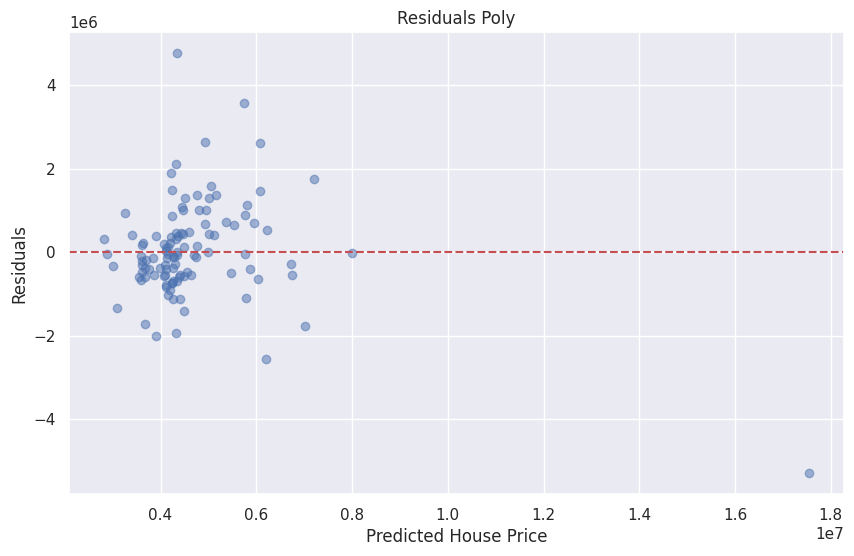

Mean Squared Error (MSE): 1414338305073.0398
R-squared (R2): 0.5091690485356608


In [ ]:
# Calculate the residuals
residuals_poly = y_test_housing - house_predicted_svr_poly

# Create a scatter plot of predicted values vs residuals
plt.figure(figsize=(10, 6))
plt.scatter(house_predicted_svr_poly, residuals_poly, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at zero
plt.xlabel('Predicted House Price')
plt.ylabel('Residuals')
plt.title('Residuals Poly')
plt.grid(True)
plt.show()
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R2): {r2_poly}")

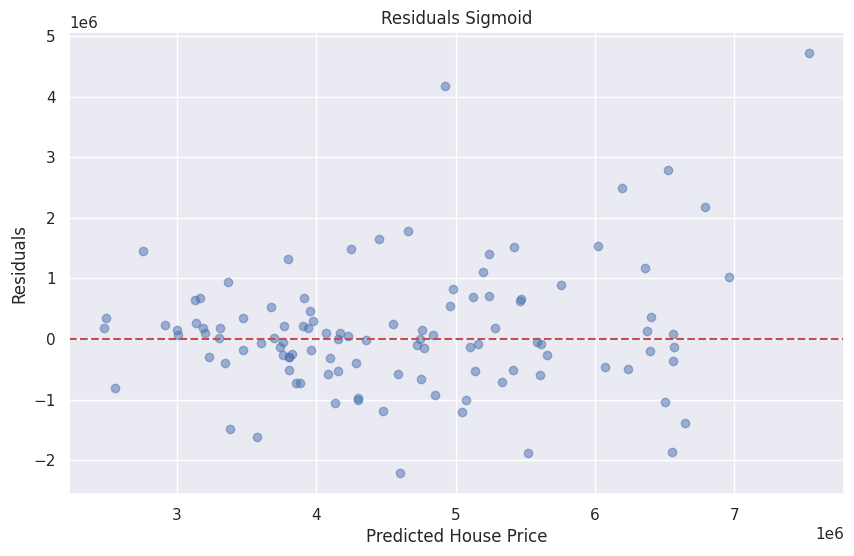

Mean Squared Error (MSE): 1118408301058.9658
R-squared (R2): 0.6118683849787705


In [ ]:
# Calculate the residuals
residuals_sigmoid = y_test_housing - house_predicted_svr_sigmoid

# Create a scatter plot of predicted values vs residuals
plt.figure(figsize=(10, 6))
plt.scatter(house_predicted_svr_sigmoid, residuals_sigmoid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at zero
plt.xlabel('Predicted House Price')
plt.ylabel('Residuals')
plt.title('Residuals Sigmoid')
plt.grid(True)
plt.show()
print(f"Mean Squared Error (MSE): {mse_sigmoid}")
print(f"R-squared (R2): {r2_sigmoid}")

The Sigmoid model seems to be the best as the Mean Squared Error is the lowest and the r2 value is the highest. This tells us that the overall mean of error on the sigmoid is best and the r2 value being highest tells us this model does the best at generalizing.
